In [1]:
import pandas as pd
import numpy as np
import sys
import os

## 2. Define Path
In this section, we defined the path that would be used. 

In [2]:
main_path = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))

In [3]:
sys.path.append(os.path.join(main_path, 'lib'))

## Read Data

In [4]:
data = pd.read_csv(os.path.join(main_path, 'cache/prep_data.csv'))
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.head(10)

,Unnamed: 0,date,ggsearch,facebook,display,promotion,day,month,leads_n,days_considered,considered_leads_n,days_purchase,purchase_leads,time_to_purchase,purchase_leads_fur
0,0,2022-02-04,2424.34,200.72,284,0,Friday,February,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2022-02-05,2110.07,407.44,194,0,Saturday,February,8,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2022-02-06,2091.32,395.24,247,0,Sunday,February,4,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2022-02-07,2867.82,415.98,211,0,Monday,February,21,0.0,0.0,0.0,0.0,66.0,1.0
4,4,2022-02-08,2569.72,433.87,283,0,Tuesday,February,17,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2022-02-09,2808.94,427.29,135,0,Wednesday,February,19,1.0,2.0,0.0,0.0,222.0,1.0
6,6,2022-02-10,2728.04,425.30,281,0,Thursday,February,18,0.0,0.0,0.0,0.0,0.0,0.0
7,7,2022-02-11,2477.71,434.02,200,0,Friday,February,15,0.0,0.0,0.0,0.0,81.0,1.0
8,8,2022-02-12,1789.40,419.92,263,0,Saturday,February,10,0.0,0.0,0.0,0.0,0.0,0.0
9,9,2022-02-13,1983.92,400.09,175,0,Sunday,February,8,0.0,0.0,0.0,0.0,0.0,0.0


data.info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          939 non-null    int64         
 1   date                939 non-null    datetime64[ns]
 2   ggsearch            939 non-null    float64       
 3   facebook            939 non-null    float64       
 4   display             939 non-null    int64         
 5   promotion           939 non-null    int64         
 6   day                 939 non-null    object        
 7   month               939 non-null    object        
 8   leads_n             939 non-null    int64         
 9   days_considered     939 non-null    float64       
 10  considered_leads_n  939 non-null    float64       
 11  days_purchase       939 non-null    float64       
 12  purchase_leads      939 non-null    float64       
 13  time_to_purchase    939 non-null    float64       

## Transformations

In [7]:
data_tr = data.copy()
data_tr['year'] = data_tr['date'].dt.year
data_tr['month'] = data_tr['date'].dt.month
data_tr['quarter'] = data_tr['date'].dt.quarter
columns_numeric = [	'ggsearch',	'facebook',	'display',	'promotion']

# Create new columns with log-transformed values
for col in columns_numeric:
    lag_col_name = f"{col}_lag1"
    data_tr[lag_col_name] = data_tr[col].shift(1)
    data_tr[lag_col_name] = data_tr[lag_col_name].fillna(0)

    log_col_name = f'log_{col}'
    data_tr[log_col_name] = data_tr[col].apply(lambda x: np.log(x+ 0.00001))
    data_tr[log_col_name] = data_tr[log_col_name].fillna(0)

data_tr.head(10)

,Unnamed: 0,date,ggsearch,facebook,display,promotion,day,month,leads_n,days_considered,...,year,quarter,ggsearch_lag1,log_ggsearch,facebook_lag1,log_facebook,display_lag1,log_display,promotion_lag1,log_promotion
0,0,2022-02-04,2424.34,200.72,284,0,Friday,2,1,0.0,...,2022,1,0.00,7.793315,0.00,5.301911,0.0,5.648974,0.0,-11.512925
1,1,2022-02-05,2110.07,407.44,194,0,Saturday,2,8,0.0,...,2022,1,2424.34,7.654476,200.72,6.009894,284.0,5.267858,0.0,-11.512925
2,2,2022-02-06,2091.32,395.24,247,0,Sunday,2,4,0.0,...,2022,1,2110.07,7.645551,407.44,5.979493,194.0,5.509388,0.0,-11.512925
3,3,2022-02-07,2867.82,415.98,211,0,Monday,2,21,0.0,...,2022,1,2091.32,7.961307,395.24,6.030637,247.0,5.351858,0.0,-11.512925
4,4,2022-02-08,2569.72,433.87,283,0,Tuesday,2,17,0.0,...,2022,1,2867.82,7.851552,415.98,6.072745,211.0,5.645447,0.0,-11.512925
5,5,2022-02-09,2808.94,427.29,135,0,Wednesday,2,19,1.0,...,2022,1,2569.72,7.940562,433.87,6.057463,283.0,4.905275,0.0,-11.512925
6,6,2022-02-10,2728.04,425.30,281,0,Thursday,2,18,0.0,...,2022,1,2808.94,7.911339,427.29,6.052795,135.0,5.638355,0.0,-11.512925
7,7,2022-02-11,2477.71,434.02,200,0,Friday,2,15,0.0,...,2022,1,2728.04,7.815090,425.30,6.073091,281.0,5.298317,0.0,-11.512925
8,8,2022-02-12,1789.40,419.92,263,0,Saturday,2,10,0.0,...,2022,1,2477.71,7.489636,434.02,6.040064,200.0,5.572154,0.0,-11.512925
9,9,2022-02-13,1983.92,400.09,175,0,Sunday,2,8,0.0,...,2022,1,1789.40,7.592830,419.92,5.991690,263.0,5.164786,0.0,-11.512925


In [8]:
dt_dummies = pd.get_dummies(data_tr, columns=['year', 'quarter','month', 'day'], 
                                  dtype=float ,
                                  drop_first=True
                                  )

In [9]:
dt_dummies.columns

Index(['Unnamed: 0', 'date', 'ggsearch', 'facebook', 'display', 'promotion',
       'leads_n', 'days_considered', 'considered_leads_n', 'days_purchase',
       'purchase_leads', 'time_to_purchase', 'purchase_leads_fur',
       'ggsearch_lag1', 'log_ggsearch', 'facebook_lag1', 'log_facebook',
       'display_lag1', 'log_display', 'promotion_lag1', 'log_promotion',
       'year_2023', 'year_2024', 'quarter_2', 'quarter_3', 'quarter_4',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

## Model

In [10]:
from sklearn.linear_model import LinearRegression, Ridge ,ElasticNet, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [11]:
## Models
seed =  2024
lr = LinearRegression()
ridge = Ridge(random_state=seed)
lasso = Lasso(random_state=seed)
elnet = ElasticNet(random_state=seed)

modelos ={
    "Linear" :lr,
    "Ridge":ridge,
    'Lasso':lasso,
    'elasticnet':elnet}

In [12]:
target = 'leads_n'
selected_vars = [ 
      #   'ggsearch', 
      #   'facebook',
      #   'display', 
       'promotion',
    #    'leads_n', 
        # 'ggsearch_lag1', 
        'log_ggsearch',
        # 'facebook_lag1',
       'log_facebook', 
      #  'display_lag1', 
       'log_display', 
      #  'promotion_lag1',
      #  'log_promotion',
       'day_Monday', 
       'day_Saturday', 
       'day_Sunday',
      'day_Thursday',
       'day_Tuesday',
         'day_Wednesday'
      #  ] + [col for col in dt_dummies.columns if 'year' in col
            
# + [col for col in dt_dummies.columns if 'quarter' in col 
]+ [col for col in dt_dummies.columns if 'month_' in col]


X = dt_dummies[selected_vars]
y = np.log(dt_dummies[target])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seed)

In [14]:
model_fit = {}
for name, model in modelos.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    metrics = [100*mean_absolute_percentage_error(np.exp(y_train), np.exp(pred)), r2_score(np.exp(y_train), np.exp(pred))]
    pred_test = model.predict(X_test)
    metrics_test = [100*mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_test)), r2_score(np.exp(y_test), np.exp(pred_test))]
    print( f'{name}: Train -MAPE:{metrics[0]}; R2: {metrics[0]}')
    print( f'{name}: Test -MAPE:{metrics_test[0]}; R2: {metrics_test[0]}')

    model_fit[name] = model
    


Linear: Train -MAPE:33.62100557628065; R2: 33.62100557628065
Linear: Test -MAPE:31.537371258770268; R2: 31.537371258770268
Ridge: Train -MAPE:33.629506674473404; R2: 33.629506674473404
Ridge: Test -MAPE:31.607947972266114; R2: 31.607947972266114
Lasso: Train -MAPE:48.30754772057133; R2: 48.30754772057133
Lasso: Test -MAPE:51.7815707162741; R2: 51.7815707162741
elasticnet: Train -MAPE:48.30754772057133; R2: 48.30754772057133
elasticnet: Test -MAPE:51.7815707162741; R2: 51.7815707162741


In [15]:
pred = lr.predict(X_train)
P_train = pd.DataFrame(np.exp(pred) ,columns=["pred"])

pred_test = lr.predict(X_test)
P_test = pd.DataFrame(np.exp(pred_test), columns=["pred"])


In [16]:
Y_pred = pd.concat([P_train, P_test], axis=0)
Y_actual = pd.concat([np.exp(y_train), np.exp(y_test)], axis=0)

# Concatenate and reset the index for the combined DataFrames
Y_pred = Y_pred.reset_index(drop=True)
Y_actual = Y_actual.reset_index(drop=True)
pd.concat([Y_pred, Y_actual], axis = 1)

,pred,leads_n
0,12.071782,13.0
1,6.812025,9.0
2,4.983150,9.0
3,15.753314,25.0
4,7.287510,6.0
...,...,...
934,13.768365,17.0
935,15.679666,11.0
936,12.293932,18.0
937,11.295580,11.0


In [17]:
import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                leads_n   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     37.71
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.40e-108
Time:                        20:45:04   Log-Likelihood:                -417.02
No. Observations:                 939   AIC:                             878.0
Df Residuals:                     917   BIC:                             984.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.4695      0.432     -5.715

In [18]:
imps = pd.DataFrame({
    'Vars': lr.feature_names_in_,
    'imps': lr.coef_
})

imps.sort_values(by ='imps', ascending=False)


,Vars,imps
1,log_ggsearch,0.562114
10,month_2,0.181122
4,day_Monday,0.163999
8,day_Tuesday,0.132185
11,month_3,0.130346
9,day_Wednesday,0.117031
2,log_facebook,0.081179
7,day_Thursday,0.063657
12,month_4,0.057432
16,month_8,0.056836


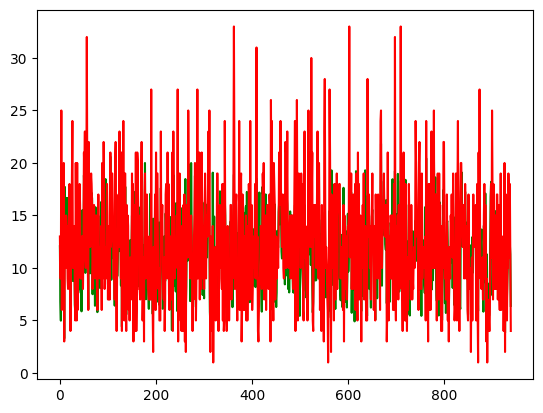

In [19]:
import matplotlib.pyplot as plt
plt.plot( Y_pred['pred'], 'g-', label='Predicted sales')
actual, = plt.plot(Y_actual.index, Y_actual, 'r-', label='Actual sales')
plt.show()